# JUICE RPWI HF SID21 (PSSR1 rich): L1a QL -- 2024/7/20

# Import lib

In [ ]:
import sys
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors

# CDF and Directory setting: set by User

In [ ]:
# The latest CDF library https://spdf.gsfc.nasa.gov/pub/software/cdf/dist/latest/
from spacepy import pycdf

import os
os.environ["CDF_LIB"] = "/Applications/cdf/cdf39_1-dist/lib"

# *** Library ***
sys.path.append('./lib/')
import juice_cal_lib   as juice_cal
# import juice_cdf_lib   as juice_cdf
import juice_math_lib  as juice_math
import juice_sid21_lib as juice_sid21
import juice_spec_lib  as juice_spec

# Setting and Read CDF file: set by User

In [ ]:
# *** Mode set ***
band_mode = 0                           # 0: sum    1: /Hz
unit_mode = 0                           # 0: raw    1: dBm＠ADC  2: V@HF   3:V2@HF   4:V2@RWI
f_mode = 0                              # 0: linear   1:log  in frequency
dump_mode = 1                           # 0: no-dump  1:plot dump

# *** Parameter set ***
cal = 0                                 # 0: background     1: CAL
p_raw_max = 10.0                        # background: 7.5   CAL: 10
p_raw_min = 3.0                         # background: 2.5   CAL: 5

p_max0 = p_raw_max
p_min0 = p_raw_min
print("MAX-min:", p_max0, p_min0)

In [ ]:
# *** Directory set: set by User ***
work_dir = '/Users/user/0-python/JUICE_python/ql/'   # Plot dump folder

# *** Ver.2 ***
# 202310 -- SAMPLE
data_dir = '/Users/user/0-python/JUICE_data/test-CCSDS/sample/cdf/'        # CDF data folder
data_name_list = ['SID21_20231024-0046.cdf',
                 ]

# 202310 -- FS
"""
data_dir = '/Users/user/0-python/JUICE_data/test-TMIDX/202311_FS/cdf/'        # CDF data folder
data_name_list = ['SID21_Seq05.cdf',
                 ]
"""

In [ ]:
# *** Group read
"""
data_dir = '/Users/user/0-python/JUICE_data/Data-CDF/2023/05/23/'        # CDF data folder
data_name = '*SID4*.cdf'
cdf_file = data_dir + data_name
data_name_list = glob.glob(cdf_file)
num_list = len(data_name_list)
data_name_list.sort()
for i in range(num_list):
    data_name_list[i] = os.path.split(data_name_list[i])[1]
"""

# get CDF data

In [ ]:
class struct:
    pass

data = struct()
num_list = len(data_name_list)

for i in range(num_list):
    data_name = data_name_list[i]
    cdf_file = data_dir + data_name
    print(i, cdf_file)

    cdf = pycdf.CDF(cdf_file)
    data1 = juice_sid21.hf_sid21_read(cdf)

    if i==0:
        data = data1
        print(data.EuEu.shape)
    else:
        data = juice_sid21.hf_sid21_add(data, data1)
        print(data.EuEu.shape)    

data_name = os.path.split(data_name)[1];  print("data name:", data_name)

In [ ]:
"""
cdf_file = data_dir + data_name
%ls $cdf_file

cdf = pycdf.CDF(cdf_file)
data = juice_sid21.juice_getdata_hf_sid21(cdf)
"""
data = juice_sid21.hf_sid21_shaping(data)

date1 = data.epoch[0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[-1]; date2 = date2.strftime('%Y/%m/%d %R:%S')
str_date = date1 + "  -  " + date2;  print(str_date)

n_time = data.EuEu.shape[0];  n_freq = data.EuEu.shape[1]
n_time0 = n_time-1
print("data size:", data.EuEu.shape, n_time, n_freq)

In [ ]:
# Mode 
N_ch = data.U_selected[0] + data.V_selected[0] + data.W_selected[0]
if (data.complex[0] == 0):
    print("complex:", data.complex[0], " (power 2-ch) <Table 6.5.2>")
    N_component = 2
else:
    print("complex:", data.complex[0], " (spectral matrix 2-ch) <Table 6.5.3>")
    N_component = 4
print("Ch:", N_ch, "  (U:", data.U_selected[0], "  V:", data.V_selected[0], "  W:", data.W_selected[0], ")")
N_frequency = data.B0_step[0] * data.B0_subdiv[0]
print("==> Component", N_component, "   Num-frequency", N_frequency, "  Num-sweep:", n_time)

In [ ]:
T_HF  = 25;  T_RWI = 25

In [ ]:
spec = juice_cal.spec_cal(data, 21, unit_mode, band_mode, T_HF, T_RWI)  # CAL
spec = juice_spec.hf_getspec_angle(spec)                                # Coherency & ange
spec = juice_spec.hf_getspec_stokes(spec)                               # Stokes and Polarization Parameters 

# Data for checks

In [ ]:
Epoch_1d       = data.epoch.tolist()
freq_1d        = data.frequency[0].tolist()
freq1          = freq_1d[0:N_frequency]
freq_width_1d  = data.freq_width[0].tolist()
freq_width1    = freq_width_1d[0:N_frequency]

EuEu_2d = data.EuEu.transpose()
EvEv_2d = data.EvEv.transpose()
EwEw_2d = data.EwEw.transpose()
E_DoLuv_2d = data.E_DoLuv.transpose()
E_DoLvw_2d = data.E_DoLvw.transpose()
E_DoLwu_2d = data.E_DoLwu.transpose()
E_DoCuv_2d = data.E_DoCuv.transpose()
E_DoCvw_2d = data.E_DoCvw.transpose()
E_DoCwu_2d = data.E_DoCwu.transpose()
E_ANGuv_2d = data.E_ANGuv.transpose()
E_ANGvw_2d = data.E_ANGvw.transpose()
E_ANGwu_2d = data.E_ANGwu.transpose()
freq_width_2d  = data.freq_width.transpose()
if band_mode == 1:
    EuEu_2d = EuEu_2d / freq_width_2d / 1000
    EvEv_2d = EvEv_2d / freq_width_2d / 1000
    EwEw_2d = EwEw_2d / freq_width_2d / 1000
    """
    print("frequency width:", freq_width1[0])
    """
#
f_min0 = freq_1d[0]
f_max0 = freq_1d[N_frequency-1]

# Raw data

In [ ]:
# Y-range
p_min = p_min0;  p_max = p_max0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(8, 1, 1)
ax2 = fig.add_subplot(8, 1, 2)
ax3 = fig.add_subplot(8, 1, 3)
ax4 = fig.add_subplot(8, 1, 4)
ax5 = fig.add_subplot(8, 1, 5)
ax6 = fig.add_subplot(8, 1, 6)
ax7 = fig.add_subplot(8, 1, 7)
ax8 = fig.add_subplot(8, 1, 8)

ax1.plot(np.ravel(data.EuEu), '-r', linewidth=1.2, label='uu')
ax1.plot(np.ravel(data.EvEv), '-g', linewidth=0.8, label='vv')
ax1.plot(np.ravel(data.EwEw), '-b', linewidth=0.5, label='ww')
ax1.set_yscale('log')
#
if data.complex[0] > 0:    # Matrix
    ax2.plot(np.ravel(data.EuEv_re), '-r', linewidth=1.0, label='uv_re')
    ax2.plot(np.ravel(data.EvEw_re), '-g', linewidth=0.8, label='vw_re')
    ax2.plot(np.ravel(data.EwEu_re), '-b', linewidth=0.6, label='wu_re')
    ax2.plot(np.ravel(data.EuEv_im), ':r', linewidth=1.2,  label='uv_im')
    ax2.plot(np.ravel(data.EvEw_im), ':g', linewidth=1.0,  label='vw_im')
    ax2.plot(np.ravel(data.EwEu_im), ':b', linewidth=0.8,  label='wu_im')
    #
    ax3.plot(np.ravel(data.E_DoPuv), '-r', linewidth=1.0, label='uv')
    ax3.plot(np.ravel(data.E_DoPvw), '-g', linewidth=0.8, label='vw')
    ax3.plot(np.ravel(data.E_DoPwu), '-b', linewidth=0.6, label='wu')
    #
    ax4.plot(np.ravel(data.E_DoLuv), '-r', linewidth=1.0, label='uv')
    ax4.plot(np.ravel(data.E_DoLvw), '-g', linewidth=0.8, label='vw')
    ax4.plot(np.ravel(data.E_DoLwu), '-b', linewidth=0.6, label='wu')
    #
    ax5.plot(np.ravel(data.E_DoCuv), '-r', linewidth=1.0, label='uv')
    ax5.plot(np.ravel(data.E_DoCvw), '-g', linewidth=0.8, label='vw')
    ax5.plot(np.ravel(data.E_DoCwu), '-b', linewidth=0.6, label='wu')
    #
    ax6.plot(np.ravel(data.E_ANGuv), '-r', linewidth=1.0, label='uv')
    ax6.plot(np.ravel(data.E_ANGvw), '-g', linewidth=0.8, label='vw')
    ax6.plot(np.ravel(data.E_ANGwu), '-b', linewidth=0.6, label='wu')

ax7.plot(np.ravel(data.frequency),     '-r', linewidth=0.6, label='frequency')
ax7.plot(np.ravel(data.freq_step*10),  '-g', linewidth=0.8, label='step*10')
ax7.plot(np.ravel(data.freq_width*10), ':b', linewidth=1.0, label='width*10')
ax8.plot(np.ravel(data.epoch), '.')

ax1.set_ylabel(spec.str)
if data.complex[0] > 0:    # Matrix
    ax2.set_ylabel('Real & Img');          ax3.set_ylabel('Deg. Pol.');  ax4.set_ylabel('Deg. Linear Pol.')
    ax5.set_ylabel('Deg. Circular Pol.');  ax6.set_ylabel('Linear Deg.')
ax7.set_ylabel('frequency [kHz]')
ax8.set_ylabel('Date-Time')
ax8.set_xlabel(str_date)
#
title_label = '[JUICE/RPWI HF PSSR1-Rich (SID-21)]  ' + data_name
ax1.set_title(title_label)
ax1.legend(loc='upper right', fontsize=8); ax7.legend(loc='upper right', fontsize=8)
if data.complex[0] > 0:    # Matrix
    ax2.legend(loc='upper right', fontsize=8); ax3.legend(loc='upper right', fontsize=8); 
    ax4.legend(loc='upper right', fontsize=8); ax5.legend(loc='upper right', fontsize=8); ax6.legend(loc='upper right', fontsize=8); 

# range: X-axis
"""
xlim=[0, N_frequency*1-1]
xlim=[50, 60]
ax1.set_xlim(xlim); ax2.set_xlim(xlim); ax3.set_xlim(xlim); ax4.set_xlim(xlim); ax5.set_xlim(xlim); ax6.set_xlim(xlim); ax7.set_xlim(xlim)
"""
# range: Y-axis
ylim=[10**p_min, 10**p_max]
ax1.set_ylim(ylim)
if data.complex[0] > 0:    # Matrix
    ylim=[-10**p_max, 10**p_max]; ax2.set_ylim(ylim)
    ylim=[-0.05, 1.05]; ax3.set_ylim(ylim); ax4.set_ylim(ylim)
    ylim=[-1.05, 1.05]; ax5.set_ylim(ylim)
    ylim=[-0.05, 185.]; ax6.set_ylim(ylim)
ylim=[f_min0, f_max0]
ax7.set_ylim(ylim)

# Plot
fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_raw.png'
    fig.savefig(png_fname)

## Spec

In [ ]:
# Sweep_num
n0 = 0
n1 = np.int16(n_time0/2)
n2 = n_time0 # - 11
# X-range
f_min = f_min0;  f_max = f_max0
# Y-range
p_min = p_min0;  p_max = p_max0

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(4, 1, 1);   ax5 = fig.add_subplot(4, 1, 2);  ax6 = fig.add_subplot(4, 1, 3);  ax7 = fig.add_subplot(4, 1, 4)
# ax4 = fig.add_subplot(6, 1, 5); ax3 = fig.add_subplot(6, 1, 6)

ax1.plot(freq1, data.EuEu[n0], ':r', linewidth=1.0, label='uu init')
ax1.plot(freq1, data.EvEv[n0], ':g', linewidth=0.8, label='vv init')
ax1.plot(freq1, data.EwEw[n0], ':b', linewidth=0.6, label='ww init')
ax1.plot(freq1, data.EuEu[n1], '-.r', linewidth=1.0, label='uu half')
ax1.plot(freq1, data.EvEv[n1], '-.g', linewidth=0.8, label='vv half')
ax1.plot(freq1, data.EwEw[n1], '-.b', linewidth=0.6, label='ww half')
ax1.plot(freq1, data.EuEu[n2], '-r', linewidth=1.0, label='uu end')
ax1.plot(freq1, data.EvEv[n2], '-g', linewidth=0.8, label='vv end')
ax1.plot(freq1, data.EwEw[n2], '-b', linewidth=0.6, label='ww end')
ax1.set_yscale('log')
if f_mode == 1:
    ax1.set_xscale('log')
#
#
if data.complex[0] > 0:    # Matrix
    """
    ax3.plot(freq1, data.EuEv_re[n1], '-r', linewidth=1.0, label='uv_re half')
    ax3.plot(freq1, data.EvEw_re[n1], '-g', linewidth=0.8, label='vw_re half')
    ax3.plot(freq1, data.EwEu_re[n1], '-b', linewidth=0.6, label='wu_re half')
    ax3.plot(freq1, data.EuEv_im[n1], ':r', linewidth=1.2,  label='uv_im half')
    ax3.plot(freq1, data.EvEw_im[n1], ':g', linewidth=1.0,  label='vw_im half')
    ax3.plot(freq1, data.EwEu_im[n1], ':b', linewidth=0.8,  label='wu_im half')
    #
    ax4.plot(freq1, data.E_DoPuv[n0], ':r', linewidth=1.0, label='uv init')
    ax4.plot(freq1, data.E_DoPvw[n0], ':g', linewidth=0.8, label='vw init')
    ax4.plot(freq1, data.E_DoPwu[n0], ':b', linewidth=0.6, label='wu init')
    ax4.plot(freq1, data.E_DoPuv[n1], '-.r', linewidth=1.2,  label='uv half')
    ax4.plot(freq1, data.E_DoPvw[n1], '-.g', linewidth=1.0,  label='vw half')
    ax4.plot(freq1, data.E_DoPwu[n1], '-.b', linewidth=0.8,  label='wu half')
    ax4.plot(freq1, data.E_DoPuv[n2], '-r', linewidth=1.2,  label='uv end')
    ax4.plot(freq1, data.E_DoPvw[n2], '-g', linewidth=1.0,  label='vw end')
    ax4.plot(freq1, data.E_DoPwu[n2], '-b', linewidth=0.8,  label='wu end')
    #
    """
    ax5.plot(freq1, data.E_DoLuv[n0], ':r', linewidth=1.0, label='uv init')
    ax5.plot(freq1, data.E_DoLvw[n0], ':g', linewidth=0.8, label='vw init')
    ax5.plot(freq1, data.E_DoLwu[n0], ':b', linewidth=0.6, label='wu init')
    ax5.plot(freq1, data.E_DoLuv[n1], '-.r', linewidth=1.2,  label='uv half')
    ax5.plot(freq1, data.E_DoLvw[n1], '-.g', linewidth=1.0,  label='vw half')
    ax5.plot(freq1, data.E_DoLwu[n1], '-.b', linewidth=0.8,  label='wu half')
    ax5.plot(freq1, data.E_DoLuv[n2], '-r', linewidth=1.2,  label='uv end')
    ax5.plot(freq1, data.E_DoLvw[n2], '-g', linewidth=1.0,  label='vw end')
    ax5.plot(freq1, data.E_DoLwu[n2], '-b', linewidth=0.8,  label='wu end')
    #
    ax6.plot(freq1, data.E_DoCuv[n0], ':r', linewidth=1.0, label='uv init')
    ax6.plot(freq1, data.E_DoCvw[n0], ':g', linewidth=0.8, label='vw init')
    ax6.plot(freq1, data.E_DoCwu[n0], ':b', linewidth=0.6, label='wu init')
    ax6.plot(freq1, data.E_DoCuv[n1], '-.r', linewidth=1.2,  label='uv half')
    ax6.plot(freq1, data.E_DoCvw[n1], '-.g', linewidth=1.0,  label='vw half')
    ax6.plot(freq1, data.E_DoCwu[n1], '-.b', linewidth=0.8,  label='wu half')
    ax6.plot(freq1, data.E_DoCuv[n2], '-r', linewidth=1.2,  label='uv end')
    ax6.plot(freq1, data.E_DoCvw[n2], '-g', linewidth=1.0,  label='vw end')
    ax6.plot(freq1, data.E_DoCwu[n2], '-b', linewidth=0.8,  label='wu end')
    #
    ax7.plot(freq1, data.E_ANGuv[n0], ':r', linewidth=1.0, label='uv init')
    ax7.plot(freq1, data.E_ANGvw[n0], ':g', linewidth=0.8, label='vw init')
    ax7.plot(freq1, data.E_ANGwu[n0], ':b', linewidth=0.6, label='wu init')
    ax7.plot(freq1, data.E_ANGuv[n1], '-.r', linewidth=1.2,  label='uv half')
    ax7.plot(freq1, data.E_ANGvw[n1], '-.g', linewidth=1.0,  label='vw half')
    ax7.plot(freq1, data.E_ANGwu[n1], '-.b', linewidth=0.8,  label='wu half')
    ax7.plot(freq1, data.E_ANGuv[n2], '-r', linewidth=1.2,  label='uv end')
    ax7.plot(freq1, data.E_ANGvw[n2], '-g', linewidth=1.0,  label='vw end')
    ax7.plot(freq1, data.E_ANGwu[n2], '-b', linewidth=0.8,  label='wu end')
    #
    if f_mode == 1:
        ax5.set_xscale('log');  ax6.set_xscale('log');  ax7.set_xscale('log')   # ax3.set_xscale('log');  ax4.set_xscale('log')

# Label
ax1.set_ylabel(spec.str)
if data.complex[0] > 0:    # Matrix
    ax5.set_ylabel('Deg. Linear Pol.')
    ax6.set_ylabel('Deg. Circular Pol.')
    ax7.set_ylabel('Linear Deg.')
    # ax4.set_ylabel('Deg. Pol.')
    # ax3.set_ylabel('Real & Img')
ax7.set_xlabel('frequency [Hz]')
#
date1 = data.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[n1];  date2 = date2.strftime('%Y/%m/%d %R:%S')
date3 = data.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')
title_date = "[" + data_name + "]  " + date1 + "  -  " + date2 + "  -  " + date3 
ax1.set_title(title_date)
ax1.legend(loc='upper right', fontsize=8)
ax5.legend(loc='upper right', fontsize=8); ax6.legend(loc='upper right', fontsize=8);  ax7.legend(loc='upper right', fontsize=8)
# ax3.legend(loc='upper right', fontsize=8); ax4.legend(loc='upper right', fontsize=8); 

# range: X-axis
xlim=[f_min, f_max]
ax1.set_xlim(xlim); ax5.set_xlim(xlim); ax6.set_xlim(xlim); ax7.set_xlim(xlim); # ax3.set_xlim(xlim); ax4.set_xlim(xlim); 
# range: Y-axis
ylim=[10**p_min, 10**p_max]; ax1.set_ylim(ylim)
if data.complex[0] > 0:    # Matrix
    ylim=[-0.05, 1.05]; ax5.set_ylim(ylim);  # ax4.set_ylim(ylim); 
    ylim=[-1.05, 1.05]; ax6.set_ylim(ylim)
    ylim=[-0.05, 185.]; ax7.set_ylim(ylim)
    # ylim=[-10**p_raw_max, 10**p_raw_max]; ax3.set_ylim(ylim)

fig.subplots_adjust(hspace=0)
fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_spec.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_spec-log.png'
    fig.savefig(png_fname)

# Peak
print("[First]")
peak_E = np.ravel(data.EuEu[n0]); peak_f = np.argmax(peak_E); print("Peak EuEu:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
peak_E = np.ravel(data.EvEv[n0]); peak_f = np.argmax(peak_E); print("Peak EvEv:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
peak_E = np.ravel(data.EwEw[n0]); peak_f = np.argmax(peak_E); print("Peak EwEw:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
print("[Mid]")
peak_E = np.ravel(data.EuEu[n1]); peak_f = np.argmax(peak_E); print("Peak EuEu:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
peak_E = np.ravel(data.EvEv[n1]); peak_f = np.argmax(peak_E); print("Peak EvEv:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
peak_E = np.ravel(data.EwEw[n1]); peak_f = np.argmax(peak_E); print("Peak EwEw:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
print("[Last]")
peak_E = np.ravel(data.EuEu[n2]); peak_f = np.argmax(peak_E); print("Peak EuEu:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
peak_E = np.ravel(data.EvEv[n2]); peak_f = np.argmax(peak_E); print("Peak EvEv:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")
peak_E = np.ravel(data.EwEw[n2]); peak_f = np.argmax(peak_E); print("Peak EwEw:", '{:.2e}'.format(peak_E[peak_f]), "at", '{:.1f}'.format(freq1[peak_f]), "kHz")

## FT

In [ ]:
# Y-range
f_min = f_min0;      f_max = f_max0
# Z-range
p_min = p_min0;      p_max = p_max0

fig2d = plt.figure(figsize=[16,11])
ax1 = fig2d.add_subplot(2, 1, 1)
ax2 = fig2d.add_subplot(2, 1, 2)

# Y-axis
ax1.set_ylim(f_min0, f_max0);      ax2.set_ylim(f_min0, f_max0)
if f_mode == 1:
    ax1.set_yscale('log');         ax2.set_yscale('log')
ax1.set_ylabel('Frequency [kHz]'); ax2.set_ylabel('Frequency [kHz]')

# X-axis
if   data.U_selected[0]==1 and data.V_selected[0]==1:
    ax1.set_title("[" + data_name + "]  " + 'EuEu');             ax2.set_title('EvEv')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
elif data.V_selected[0]==1 and data.W_selected[0]==1:
    ax1.set_title("[" + data_name + "]  " + 'EvEv');             ax2.set_title('EwEw')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EvEv_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
else:
    ax2.set_title("[" + data_name + "]  " + 'EwEw');             ax3.set_title('EuEu')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EwEw_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EuEu_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
ax2.set_xlabel(str_date)
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label(spec.str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical");  pp2.set_label(spec.str)

plt.subplots_adjust(hspace=0.03)
plt.show()
if dump_mode == 1:
    png_fname = work_dir+data_name+'_FT.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT-log.png'
    fig2d.savefig(png_fname)

## Ang-T

In [ ]:
# Y-range
f_min0 = f_min;      f_max0 = f_max
# Z-range
p_min0 = p_min;      p_max0 = p_max

fig2d = plt.figure(figsize=[16,11])
ax1 = fig2d.add_subplot(3, 1, 1);  ax2 = fig2d.add_subplot(3, 1, 2);  ax3 = fig2d.add_subplot(3, 1, 3)

# Y-axis
ax1.set_ylim(f_min0, f_max0);      ax2.set_ylim(f_min0, f_max0);      ax3.set_ylim(f_min0, f_max0)
if f_mode == 1:
    ax1.set_yscale('log');         ax2.set_yscale('log');             ax3.set_yscale('log')
ax1.set_ylabel('Frequency [kHz]'); ax2.set_ylabel('Frequency [kHz]'); ax3.set_ylabel('Frequency [kHz]')

# X-axis
if   data.U_selected[0]==1 and data.V_selected[0]==1:
    ax1.set_title("[" + data_name + "]  " + 'Deg. Lin. uv'); ax2.set_title('Deg. Cir. uv');     ax3.set_title('Ang. uv');
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, E_DoLuv_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, E_DoCuv_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
    p3 = ax3.pcolormesh(Epoch_1d, freq_1d, E_ANGuv_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
elif data.V_selected[0]==1 and data.W_selected[0]==1:
    ax1.set_title("[" + data_name + "]  " + 'Deg. Lin. vw'); ax2.set_title('Deg. Cir. vw');     ax3.set_title('Ang. vw');  
    p2 = ax1.pcolormesh(Epoch_1d, freq_1d, E_DoLvw_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
    p5 = ax2.pcolormesh(Epoch_1d, freq_1d, E_DoCvw_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
    p8 = ax3.pcolormesh(Epoch_1d, freq_1d, E_ANGvw_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
else:
    ax1.set_title("[" + data_name + "]  " + 'Deg. Lin. wu'); ax2.set_title('Deg. Cir. wu');     ax3.set_title('Ang. wu')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, E_DoLwu_2d, norm=colors.Normalize(vmin=-0.01, vmax=1.01), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, E_DoCwu_2d, norm=colors.Normalize(vmin=-1.01, vmax=1.01), cmap='bwr')
    p3 = ax3.pcolormesh(Epoch_1d, freq_1d, E_ANGwu_2d, norm=colors.Normalize(vmin=-1.00, vmax=181.), cmap='hsv')
ax3.set_xlabel(str_date)
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical")
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical")
pp3 = fig2d.colorbar(p3, ax=ax3, orientation="vertical")

plt.subplots_adjust(hspace=0)
plt.show()
png_fname = work_dir+data_name+'_AngT.png'
if dump_mode == 1:
    if f_mode == 1:
        png_fname = work_dir+data_name+'_AngT-log.png'
    fig2d.savefig(png_fname)

# CLEANED data

In [ ]:
EuEu_c = juice_math.clean_rfi(np.ravel(data.EuEu), 17)
EvEv_c = juice_math.clean_rfi(np.ravel(data.EvEv), 17)
EwEw_c = juice_math.clean_rfi(np.ravel(data.EwEw), 17)
EuEu_c = EuEu_c.reshape(n_time, n_freq)
EvEv_c = EvEv_c.reshape(n_time, n_freq)
EwEw_c = EwEw_c.reshape(n_time, n_freq)
EuEu_c_2d = EuEu_c.transpose()
EvEv_c_2d = EvEv_c.transpose()
EwEw_c_2d = EwEw_c.transpose()

## CLEANED - Spec

In [ ]:
# Sweep_num
n0 = 0
n1 = np.int16(n_time0/2)
n2 = n_time0
# X-range
f_min0 = f_min;  f_max0 = f_max
# Y-range
p_min0 = p_min;  p_max0 = p_max

fig = plt.figure(figsize=(14, 11))
ax1 = fig.add_subplot(2, 1, 1)
ax2 = fig.add_subplot(2, 1, 2)

ax1.plot(freq1, data.EuEu[n0], ':r', linewidth=1.0, label='uu init')
ax1.plot(freq1, data.EvEv[n0], ':g', linewidth=0.8, label='vv init')
ax1.plot(freq1, data.EwEw[n0], ':b', linewidth=0.6, label='ww init')
ax1.plot(freq1, data.EuEu[n1], '-.r', linewidth=1.0, label='uu half')
ax1.plot(freq1, data.EvEv[n1], '-.g', linewidth=0.8, label='vv half')
ax1.plot(freq1, data.EwEw[n1], '-.b', linewidth=0.6, label='ww half')
ax1.plot(freq1, data.EuEu[n2], '-r', linewidth=1.0, label='uu end')
ax1.plot(freq1, data.EvEv[n2], '-g', linewidth=0.8, label='vv end')
ax1.plot(freq1, data.EwEw[n2], '-b', linewidth=0.6, label='ww end')
ax2.plot(freq1, EuEu_c[n0], ':r', linewidth=1.0, label='uu init cleaned')
ax2.plot(freq1, EvEv_c[n0], ':g', linewidth=0.8, label='vv init cleaned')
ax2.plot(freq1, EwEw_c[n0], ':b', linewidth=0.6, label='ww init cleaned')
ax2.plot(freq1, EuEu_c[n1], '-.r', linewidth=1.0, label='uu half cleaned')
ax2.plot(freq1, EvEv_c[n1], '-.g', linewidth=0.8, label='vv half cleaned')
ax2.plot(freq1, EwEw_c[n1], '-.b', linewidth=0.6, label='ww half cleaned')
ax2.plot(freq1, EuEu_c[n2], '-r', linewidth=1.0, label='uu end cleaned')
ax2.plot(freq1, EvEv_c[n2], '-g', linewidth=0.8, label='vv end cleaned')
ax2.plot(freq1, EwEw_c[n2], '-b', linewidth=0.6, label='ww end cleaned')
ax1.set_yscale('log');      ax2.set_yscale('log')
if f_mode == 1:
    ax1.set_xscale('log');  ax2.set_xscale('log')

# Label
ax1.set_ylabel(spec.str);  ax2.set_ylabel(spec.str)
ax2.set_xlabel('frequency [Hz]')
#
date1 = data.epoch[n0];  date1 = date1.strftime('%Y/%m/%d %R:%S')
date2 = data.epoch[n1];  date2 = date2.strftime('%Y/%m/%d %R:%S')
date3 = data.epoch[n2];  date3 = date3.strftime('%Y/%m/%d %R:%S')
title_date = "[" + data_name + "]  " + date1 + "  -  " + date2 + "  -  " + date3 
ax1.set_title(title_date)
ax1.legend(loc='upper right', fontsize=8); ax2.legend(loc='upper right', fontsize=8)

# range: X-axis
xlim=[f_min0, f_max0];         ax1.set_xlim(xlim); ax2.set_xlim(xlim);
xlim=[1500, 1700];         ax1.set_xlim(xlim); ax2.set_xlim(xlim);
# range: Y-axis
ylim=[10**p_min0, 10**p_max0]; ax1.set_ylim(ylim); ax2.set_ylim(ylim)

fig.subplots_adjust(hspace=0)
fig.show
if dump_mode == 1:
    png_fname = work_dir+data_name+'_spec-c.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_spec-log-c.png'
    # fig2d.savefig(png_fname)

## CLEANED -- FT

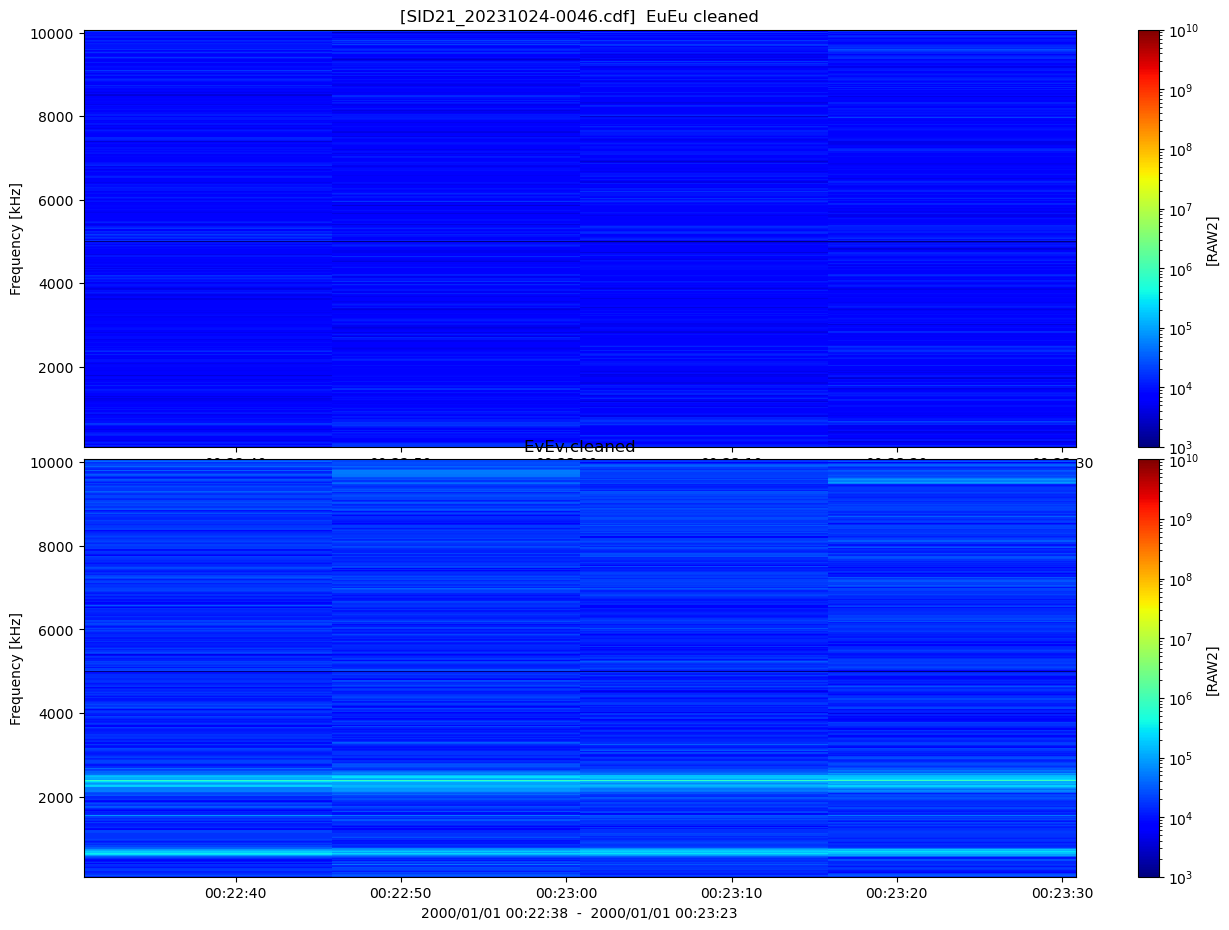

In [18]:
# Y-range
f_min0 = f_min;      f_max0 = f_max
# Z-range
p_min0 = p_min;      p_max0 = p_max

fig2d = plt.figure(figsize=[16,11])
ax1 = fig2d.add_subplot(2, 1, 1)
ax2 = fig2d.add_subplot(2, 1, 2)

# Y-axis
ax1.set_ylim(f_min0, f_max0);      ax2.set_ylim(f_min0, f_max0)
if f_mode == 1:
    ax1.set_yscale('log');         ax2.set_yscale('log')
ax1.set_ylabel('Frequency [kHz]'); ax2.set_ylabel('Frequency [kHz]')

# X-axis
if   data.U_selected[0]==1 and data.V_selected[0]==1:
    ax1.set_title("[" + data_name + "]  " + 'EuEu cleaned'); ax2.set_title('EvEv cleaned')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
elif data.V_selected[0]==1 and data.W_selected[0]==1:
    ax1.set_title("[" + data_name + "]  " + 'EvEv cleaned'); ax2.set_title('EwEw cleaned')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EvEv_c_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
else:
    ax2.set_title("[" + data_name + "]  " + 'EwEw cleaned'); ax3.set_title('EuEu cleaned')
    p1 = ax1.pcolormesh(Epoch_1d, freq_1d, EwEw_c_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
    p2 = ax2.pcolormesh(Epoch_1d, freq_1d, EuEu_c_2d, norm=colors.LogNorm(vmin=10**p_min0, vmax=10**p_max0), cmap='jet')
ax2.set_xlabel(str_date)
pp1 = fig2d.colorbar(p1, ax=ax1, orientation="vertical");  pp1.set_label(spec.str)
pp2 = fig2d.colorbar(p2, ax=ax2, orientation="vertical");  pp2.set_label(spec.str)

plt.subplots_adjust(hspace=0.03)
plt.show()
if dump_mode == 1:
    png_fname = work_dir+data_name+'_FT-c.png'
    if f_mode == 1:
        png_fname = work_dir+data_name+'_FT-log-c.png'
    # fig2d.savefig(png_fname)